# **K-means in images**

# Import Lib

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load Image

In [2]:
image=cv2.imread('../input/bird-img/bird.tiff')

In [3]:
print("shape of Image:",image.shape)

shape of Image: (538, 538, 3)


# K-means

In [4]:
def kmeans(image,k,iteration): # expects img in rgb
    img=image.copy()
    M = image.shape[0]
    N = image.shape[1]
    sum_dis=0
    channel = image.shape[2]
    original_img=image.copy()
    clusters=np.random.randint(0,255,size=(k,3))
    print('initialize clusters:\n','***', clusters, '***')
    for it in range(iteration):
        img=image.copy()
        for i in range(M):
            for j in range(N):
                x=img[i][j]
                distance=np.sqrt(np.sum((clusters-x)**2,axis=1))
                sum_dis+=distance**2
                channel=np.argmin(distance)
                img[i][j]=clusters[channel]
        loss=0
        L=[]
        for i in range(k):
            y,X,channel=np.where(img==clusters[i])
            k_points=original_img[y,X]
            L.append(np.sum(clusters[i]-k_points))
            clusters[i]=np.mean(k_points,axis=0)
        loss=sum(L)    
        print('\nCluster centroids at iteration-{}'.format(it+1),"\n", clusters)
        print('\nloss at iteration-{}:'.format(it+1),loss)
    return img,sum_dis

In [5]:
clusters,dis=kmeans(image,16,5)

initialize clusters:
 *** [[171  18 145]
 [121  56 133]
 [190  99 125]
 [204 188  67]
 [146  64 250]
 [ 13  71 201]
 [ 31  62  91]
 [ 74 196 124]
 [123   5 209]
 [ 84  86   7]
 [247  57 191]
 [ 42  99 146]
 [168 208 132]
 [202 143 141]
 [110 254 140]
 [157  78  73]] ***


/opt/conda/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3420: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/conda/lib/python3.7/site-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret, rcount, out=ret, casting='unsafe', subok=False)



Cluster centroids at iteration-1 
 [[-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [                 105                  103                  129]
 [                  79                  119                  153]
 [                 219                  165                   96]
 [                 112                  161                  244]
 [                  46                  134                  231]
 [                  33                   37                   40]
 [                  99                  167                  199]
 [-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [                  62                   53                   39]
 [-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [                  66                  118                  158]
 [                 176                  214                  229]
 [                 174                  161                  176]
 [                 126                  

In [6]:
sum_d = []
list_k = [2,16,64,100,256]
for k in list_k:
    img,sum_dis = kmeans(image,k,5)
    sum_d.append(sum_dis)
#------------------------------------
sum_t=[]
sumd=0
for i in range(5):
    for j in sum_d[i]:
        sumd+=j
    sum_t.append(sumd)

initialize clusters:
 *** [[ 21 219 115]
 [154  78 210]] ***

Cluster centroids at iteration-1 
 [[ 33  50  56]
 [130 163 189]]

loss at iteration-1: 54823677

Cluster centroids at iteration-2 
 [[ 39  45  50]
 [132 174 202]]

loss at iteration-2: -11445690

Cluster centroids at iteration-3 
 [[ 40  46  51]
 [133 175 203]]

loss at iteration-3: -4141986

Cluster centroids at iteration-4 
 [[ 40  47  52]
 [133 175 204]]

loss at iteration-4: -2584938

Cluster centroids at iteration-5 
 [[ 40  47  52]
 [133 176 204]]

loss at iteration-5: -1901205
initialize clusters:
 *** [[ 38  16 230]
 [150 254 195]
 [152 126 201]
 [ 95 185 101]
 [ 52  29 210]
 [ 46 253 159]
 [  4  17  70]
 [ 92  92 102]
 [ 98  99 238]
 [ 61  56  48]
 [204  85 232]
 [ 59  86  86]
 [148 133  58]
 [215  47 233]
 [158 189  53]
 [116   6 187]] ***

Cluster centroids at iteration-1 
 [[-9223372036854775808 -9223372036854775808 -9223372036854775808]
 [                 181                  224                  238]
 [       

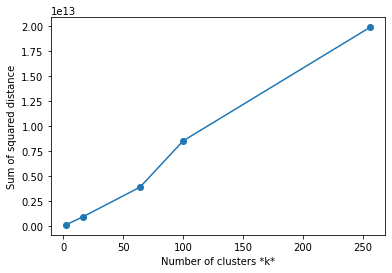

In [7]:
plt.plot(list_k, sum_t, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

# Plot Image

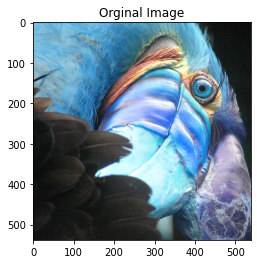

In [8]:
plt.title("Orginal Image")
plt.imshow(image,cmap=plt.cm.gray)

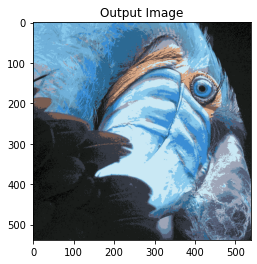

In [9]:
plt.title("Output Image")
plt.imshow(clusters,cmap=plt.cm.gray)

# Finished!